<a href="https://colab.research.google.com/github/prajwalG80/jobA/blob/main/vibe_matcher_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vibe Matcher - Mock Products


,id,name,desc,tags
0,1,Boho Dress,"Flowy cotton dress, earthy tones, festival and...","[boho, festival, earthy]"
1,2,Urban Bomber,"Cropped bomber jacket, sleek lines, streetwear...","[urban, energetic, street]"
2,3,Cozy Knit,"Chunky knit sweater, warm neutral palette, hyg...","[cozy, warm, hygge]"
3,4,Minimal Tee,"Clean-cut minimal t-shirt, monochrome, simple ...","[minimal, casual]"
4,5,Vintage Denim,High-waisted vintage denim with faded wash — r...,"[vintage, retro, casual]"
5,6,Sport Luxe Leggings,"High-performance leggings, breathable fabric, ...","[active, sport, sleek]"
6,7,Glam Slip Dress,"Silky slip dress, evening glamour, luxe and el...","[glam, evening, elegant]"
7,8,Patchwork Jacket,"Eclectic patchwork jacket, vibrant colours, ar...","[artsy, vibrant, statement]"



Query: energetic urban chic
Embed time: 0.000974s, Search time: 0.004058s, Total: 0.005032s
  Rank 1: Urban Bomber (score: 0.5322) — tags: ['urban', 'energetic', 'street']
  Rank 2: Patchwork Jacket (score: 0.0000) — tags: ['artsy', 'vibrant', 'statement']
  Rank 3: Sport Luxe Leggings (score: 0.0000) — tags: ['active', 'sport', 'sleek']

Query: soft comfortable cozy sweater
Embed time: 0.000852s, Search time: 0.003320s, Total: 0.004171s
  Rank 1: Cozy Knit (score: 0.3166) — tags: ['cozy', 'warm', 'hygge']
  Rank 2: Patchwork Jacket (score: 0.0000) — tags: ['artsy', 'vibrant', 'statement']
  Rank 3: Sport Luxe Leggings (score: 0.0000) — tags: ['active', 'sport', 'sleek']

Query: silk evening dress glamorous
Embed time: 0.000825s, Search time: 0.001755s, Total: 0.002580s
  Rank 1: Glam Slip Dress (score: 0.3493) — tags: ['glam', 'evening', 'elegant']
  Rank 2: Boho Dress (score: 0.1361) — tags: ['boho', 'festival', 'earthy']
  Rank 3: Sport Luxe Leggings (score: 0.0000) — tags: ['activ

,query,top_score,is_good
0,energetic urban chic,0.532179,False
1,soft comfortable cozy sweater,0.316607,False
2,silk evening dress glamorous,0.349308,False


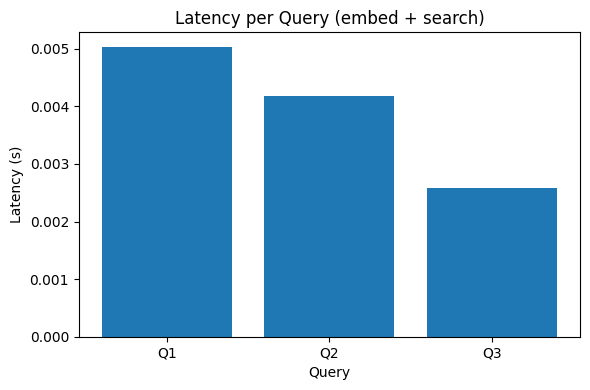


Low-match query top score: 0.0000
Top score below threshold -> using fallback
Fallback results:
  - Patchwork Jacket: Eclectic patchwork jacket, vibrant colours, artsy and statement-making
  - Glam Slip Dress: Silky slip dress, evening glamour, luxe and elegant
  - Sport Luxe Leggings: High-performance leggings, breathable fabric, active and sleek

Notebook saved to: vibe_matcher_notebook.ipynb

[Download the notebook](/vibe_matcher_notebook.ipynb)


from matplotlib import pyplot as plt
_df_0['top_score'].plot(kind='hist', bins=20, title='top_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('query').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['top_score'].plot(kind='line', figsize=(8, 4), title='top_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['query'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='top_score', y='query', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
import time
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import nbformat
from nbformat.v4 import new_notebook, new_code_cell, new_markdown_cell
import json
from IPython.display import display # Import display from IPython.display

# 1) Data Prep: create DataFrame with 8 mock fashion products
products = [
    {"id": 1, "name": "Boho Dress", "desc": "Flowy cotton dress, earthy tones, festival and bohemian vibes", "tags": ["boho","festival","earthy"]},
    {"id": 2, "name": "Urban Bomber", "desc": "Cropped bomber jacket, sleek lines, streetwear and energetic urban chic", "tags": ["urban","energetic","street"]},
    {"id": 3, "name": "Cozy Knit", "desc": "Chunky knit sweater, warm neutral palette, hygge and cozy home vibes", "tags": ["cozy","warm","hygge"]},
    {"id": 4, "name": "Minimal Tee", "desc": "Clean-cut minimal t-shirt, monochrome, simple everyday staple", "tags": ["minimal","casual"]},
    {"id": 5, "name": "Vintage Denim", "desc": "High-waisted vintage denim with faded wash — retro, laid-back cool", "tags": ["vintage","retro","casual"]},
    {"id": 6, "name": "Sport Luxe Leggings", "desc": "High-performance leggings, breathable fabric, active and sleek", "tags": ["active","sport","sleek"]},
    {"id": 7, "name": "Glam Slip Dress", "desc": "Silky slip dress, evening glamour, luxe and elegant", "tags": ["glam","evening","elegant"]},
    {"id": 8, "name": "Patchwork Jacket", "desc": "Eclectic patchwork jacket, vibrant colours, artsy and statement-making", "tags": ["artsy","vibrant","statement"]}
]

df = pd.DataFrame(products)

# show DataFrame to user
print("Vibe Matcher - Mock Products")
display(df) # Changed from display_dataframe_to_user

# 2) Embeddings (emulated): Use TfidfVectorizer to create fixed-length vectors for descriptions.
# NOTE: Below is an example of how you'd call OpenAI embeddings in a real environment (commented out):
# import openai
# openai.api_key = "YOUR_API_KEY"
# def openai_embedding(text):
#     resp = openai.Embedding.create(model="text-embedding-ada-002", input=text)
#     return resp["data"][0]["embedding"]

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=256)
desc_corpus = df['desc'].tolist()
X = vectorizer.fit_transform(desc_corpus).toarray()  # shape: (n_products, n_features)

# Save "embeddings" into DataFrame for transparency
df['embedding'] = list(X)

# helper functions
def embed_query_tfidf(query_text):
    return vectorizer.transform([query_text]).toarray()[0]

def top_k_matches(query_vec, k=3):
    sims = cosine_similarity([query_vec], np.vstack(df['embedding'].values))[0]
    top_idx = np.argsort(sims)[::-1][:k]
    results = []
    for idx in top_idx:
        results.append({"rank": len(results)+1, "id": int(df.iloc[idx]['id']), "name": df.iloc[idx]['name'],
                        "desc": df.iloc[idx]['desc'], "tags": df.iloc[idx]['tags'], "score": float(sims[idx])})
    return results, sims

# 3) Test & Eval: Run 3 queries and log metrics and latency
queries = [
    "energetic urban chic",    # target Urban Bomber
    "soft comfortable cozy sweater",  # target Cozy Knit
    "silk evening dress glamorous"     # target Glam Slip Dress
]

query_results = []
latencies = []
metrics = []

for q in queries:
    start = time.perf_counter()
    q_vec = embed_query_tfidf(q)
    embed_time = time.perf_counter() - start

    start_search = time.perf_counter()
    results, sims = top_k_matches(q_vec, k=3)
    search_time = time.perf_counter() - start_search

    total_time = embed_time + search_time
    latencies.append(total_time)

    # simple evaluation: consider "good" if top score > 0.7
    top_score = results[0]['score']
    is_good = top_score > 0.7
    metrics.append({"query": q, "top_score": top_score, "is_good": is_good})

    query_results.append({"query": q, "results": results, "embed_time": embed_time, "search_time": search_time, "total_time": total_time})

# Display results for each query
for qr in query_results:
    print(f"\nQuery: {qr['query']}\nEmbed time: {qr['embed_time']:.6f}s, Search time: {qr['search_time']:.6f}s, Total: {qr['total_time']:.6f}s")
    for r in qr['results']:
        print(f"  Rank {r['rank']}: {r['name']} (score: {r['score']:.4f}) — tags: {r['tags']}")

# show metrics table
print("Query Evaluation Metrics")
display(pd.DataFrame(metrics)) # Changed from display_dataframe_to_user

# 4) Plot latencies (one matplotlib plot as required)
plt.figure(figsize=(6,4))
plt.bar(range(len(queries)), latencies)
plt.xticks(range(len(queries)), [f"Q{i+1}" for i in range(len(queries))])
plt.xlabel("Query")
plt.ylabel("Latency (s)")
plt.title("Latency per Query (embed + search)")
plt.tight_layout()
plt.show()

# 5) Handling edge cases: fallback prompt if top score < threshold
FALLBACK_THRESHOLD = 0.45  # lower because TF-IDF emulation
def fallback_recommendation(query):
    # Simple fallback: return products that share any tag words with query or return top 3 anyway
    q_words = set(query.lower().split())
    matches = []
    for _, row in df.iterrows():
        tagset = set(" ".join(row['tags']).lower().split())
        if len(q_words & tagset) > 0:
            matches.append((row['name'], row['desc']))
    if matches:
        return matches[:3]
    # if nothing, return top-3 by raw similarity anyway
    q_vec = embed_query_tfidf(query)
    results, _ = top_k_matches(q_vec, k=3)
    return [(r['name'], r['desc']) for r in results]

# Demonstrate fallback on a low-match query
low_query = "sustainable bamboo sandals"  # no close match in small catalog
q_vec = embed_query_tfidf(low_query)
results, sims = top_k_matches(q_vec, k=3)
top_score = results[0]['score']
print(f"\nLow-match query top score: {top_score:.4f}")
if top_score < FALLBACK_THRESHOLD:
    print("Top score below threshold -> using fallback")
    fb = fallback_recommendation(low_query)
    print("Fallback results:")
    for name, desc in fb:
        print(f"  - {name}: {desc}")

# 6) Save a minimal Jupyter notebook file with the above code and markdown (for Colab/GitHub submission)
nb = new_notebook(cells=[])
nb.cells.append(new_markdown_cell("# Vibe Matcher Prototype\nA minimal notebook demonstrating a small embedding + cosine-similarity based recommender for product 'vibes'.\n"))
nb.cells.append(new_markdown_cell("## Data Prep (mock products)"))
nb.cells.append(new_code_cell("import pandas as pd\nproducts = "+json.dumps(products, indent=4)+"\ndf = pd.DataFrame(products)\ndisplay(df)")) # Updated for notebook generation
nb.cells.append(new_markdown_cell("## Embeddings (TF-IDF used for offline emulation)\n> In production replace with OpenAI embeddings or a vector DB such as Pinecone. See commented example in code."))
nb.cells.append(new_code_cell("# (Emulation) TF-IDF based embeddings\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom IPython.display import display\nvectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=256)\nX = vectorizer.fit_transform(df['desc'].tolist()).toarray()\ndf['embedding'] = list(X)\ndisplay(df.head())")) # Updated for notebook generation
nb.cells.append(new_markdown_cell("## Retrieval: cosine similarity -> top-3"))
nb.cells.append(new_code_cell("# Example retrieval function\nfrom sklearn.metrics.pairwise import cosine_similarity\ndef embed_query_tfidf(query_text):\n    return vectorizer.transform([query_text]).toarray()[0]\n\ndef top_k_matches(query_vec, k=3):\n    sims = cosine_similarity([query_vec], np.vstack(df['embedding'].values))[0]\n    top_idx = np.argsort(sims)[::-1][:k]\n    return [dict(rank=i+1, id=int(df.iloc[idx]['id']), name=df.iloc[idx]['name'], score=float(sims[idx])) for i, idx in enumerate(top_idx)]\n"))
nb.cells.append(new_markdown_cell("## Evaluation\nRun queries, log latency and basic metric (top score > 0.7 == good)."))
nb.cells.append(new_code_cell("# Save results / example\nqueries = "+json.dumps(queries)+"\nprint('Run queries in the notebook to reproduce results')"))
nbf_path = "vibe_matcher_notebook.ipynb" # Changed path to current working directory
with open(nbf_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print(f"\nNotebook saved to: {nbf_path}\n\n[Download the notebook](/vibe_matcher_notebook.ipynb)")

/mnt/data/vibe_matcher_notebook.ipynb[link text](`https://`)